In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv('goog.csv')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

def create_sequences(data, time_steps=6):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(x), np.array(y)

x, y = create_sequences(scaled_data)

model = Sequential([
    LSTM(50, input_shape=(x.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=100, batch_size=4, validation_split=0.05)


Epoch 1/100
13/13 [==============================] - 6s 156ms/step - loss: 0.1600 - val_loss: 0.1839
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0316 - val_loss: 9.1271e-05
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0255 - val_loss: 0.0145
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0218 - val_loss: 0.0342
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0194 - val_loss: 0.0078
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0195 - val_loss: 0.0147
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0187 - val_loss: 0.0132
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0190 - val_loss: 0.0076
Epoch 9/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0191 - val_loss: 0.0121
Epoch 10/100
13/13 [==============================] - 0s 26ms/step - loss: 0.0181 - val_loss: 0

In [5]:
y_pred = model.predict(x)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y.reshape(-1, 1))

2/2 [==============================] - 0s 6ms/step


In [6]:
last_day_price = data['Close'].values[-1]
last_6_days = data['Close'][-6:].values.reshape(-1, 1)
last_6_days_scaled = scaler.transform(last_6_days)
x_pred = last_6_days_scaled.reshape((1, 6, 1))

In [8]:
pred_price = model.predict(x)
pred_price = scaler.inverse_transform(pred_price)
print('Actual price for the last day:', last_day_price)
print('Predicted price for the last day:', pred_price)

2/2 [==============================] - 0s 6ms/step
Actual price for the last day: 852.119995
Predicted price for the last day: [[795.218  ]
 [791.7801 ]
 [789.0836 ]
 [782.2212 ]
 [787.47943]
 [790.8035 ]
 [795.93176]
 [805.03784]
 [808.7438 ]
 [808.05615]
 [809.2786 ]
 [808.84656]
 [809.72754]
 [807.7473 ]
 [807.9869 ]
 [805.6786 ]
 [806.7776 ]
 [817.2815 ]
 [824.1859 ]
 [834.07294]
 [833.44794]
 [824.9636 ]
 [806.81256]
 [799.4608 ]
 [799.14734]
 [801.44183]
 [803.9618 ]
 [804.3745 ]
 [807.9831 ]
 [810.187  ]
 [811.41077]
 [814.41534]
 [819.2875 ]
 [821.5308 ]
 [820.48425]
 [823.78845]
 [828.09357]
 [831.8335 ]
 [831.56   ]
 [831.4561 ]
 [829.54114]
 [829.68207]
 [825.23206]
 [833.55164]
 [832.8258 ]
 [830.0087 ]
 [828.32697]
 [831.638  ]
 [835.88586]
 [838.92   ]
 [842.93585]
 [845.5004 ]
 [845.8284 ]
 [847.1015 ]
 [849.047  ]]


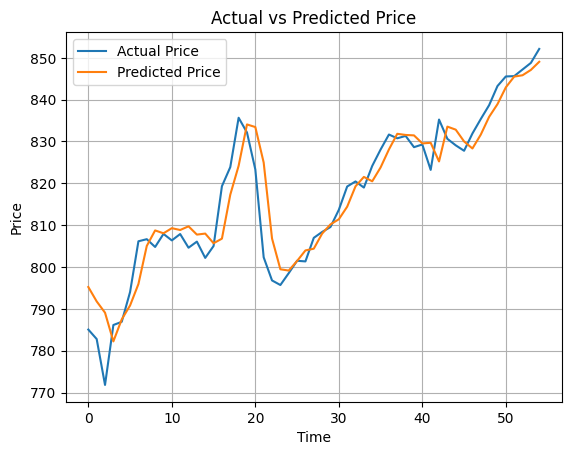

In [9]:
# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()